In [315]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [316]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('L')
        img = img.resize((128, 128))
        img_array = np.array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

In [317]:
no_images, no_labels = load_images_from_folder('Brain Tumor Dataset/no', 0)
yes_images, yes_labels = load_images_from_folder('Brain Tumor Dataset/yes', 1)

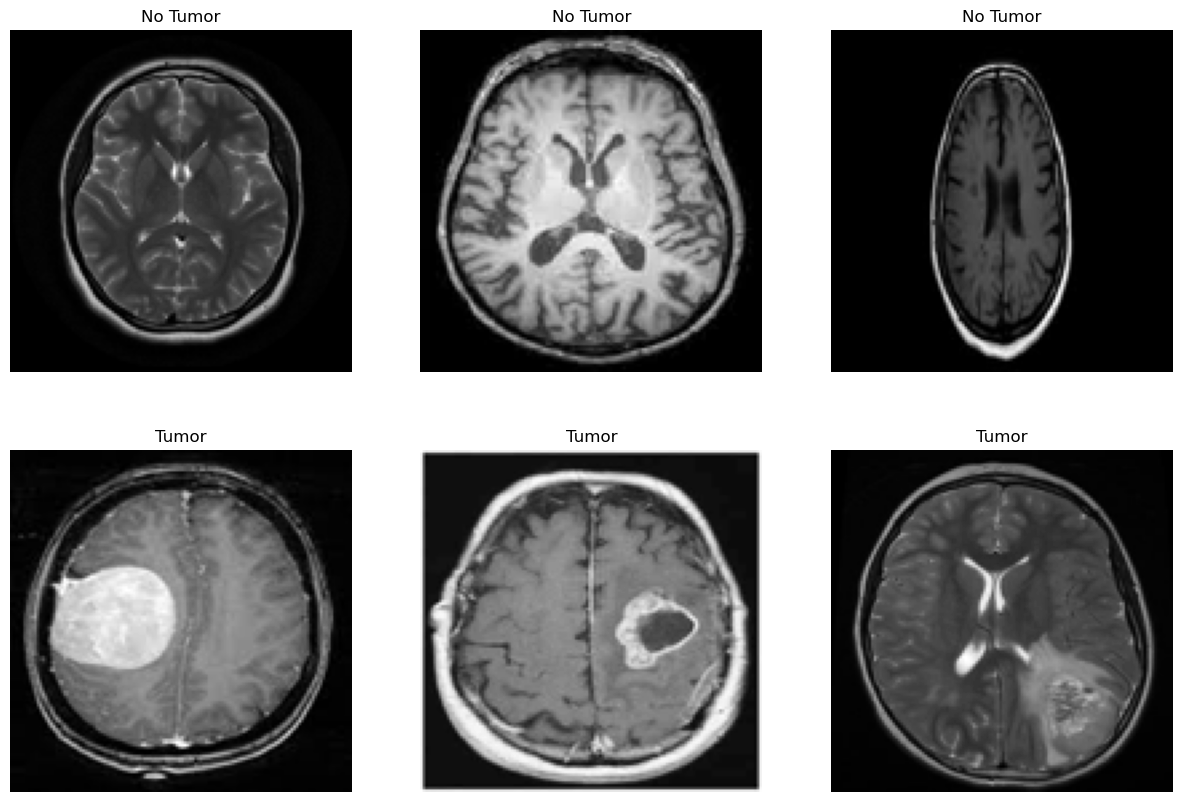

In [318]:
# visualize three images from each class
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(3):
    axs[0, i].imshow(no_images[i], cmap='gray')
    axs[0, i].set_title('No Tumor')
    axs[0, i].axis('off')
    axs[1, i].imshow(yes_images[i], cmap='gray')
    axs[1, i].set_title('Tumor')
    axs[1, i].axis('off')

In [319]:
# combine the images and labels
images = no_images + yes_images
labels = no_labels + yes_labels

# Augment the images by flipping them horizontally
augmented_images = []
augmented_labels = []
for i in range(len(images)):
    augmented_images.append(images[i])
    augmented_labels.append(labels[i])
    augmented_images.append(np.fliplr(images[i]))
    augmented_labels.append(labels[i])

In [320]:
# convert the images and labels to numpy arrays
images = np.array(augmented_images)
labels = np.array(augmented_labels)

# encode the labels to categorical
labels = to_categorical(labels)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [321]:
# build the model
model = Sequential()
model.add(Flatten(input_shape=(128, 128)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [322]:
# define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [323]:
# train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 1s 89ms/step - loss: 727.5113 - accuracy: 0.5294 - val_loss: 498.5161 - val_accuracy: 0.6173
Epoch 2/1000
6/6 [==============================] - 0s 51ms/step - loss: 375.8856 - accuracy: 0.5604 - val_loss: 78.9680 - val_accuracy: 0.6543
Epoch 3/1000
6/6 [==============================] - 0s 48ms/step - loss: 202.1770 - accuracy: 0.6037 - val_loss: 193.9804 - val_accuracy: 0.3951
Epoch 4/1000
6/6 [==============================] - 0s 43ms/step - loss: 180.3309 - accuracy: 0.5759 - val_loss: 78.3564 - val_accuracy: 0.6173
Epoch 5/1000
6/6 [==============================] - 0s 43ms/step - loss: 166.4808 - accuracy: 0.5789 - val_loss: 87.2361 - val_accuracy: 0.6296
Epoch 6/1000
6/6 [==============================] - 0s 47ms/step - loss: 182.1664 - accuracy: 0.6223 - val_loss: 51.4491 - val_accuracy: 0.5926
Epoch 7/1000
6/6 [==============================] - 0s 42ms/step - loss: 115.7955 - accuracy: 0.5728 - val_loss: 28.0132 - val_accurac

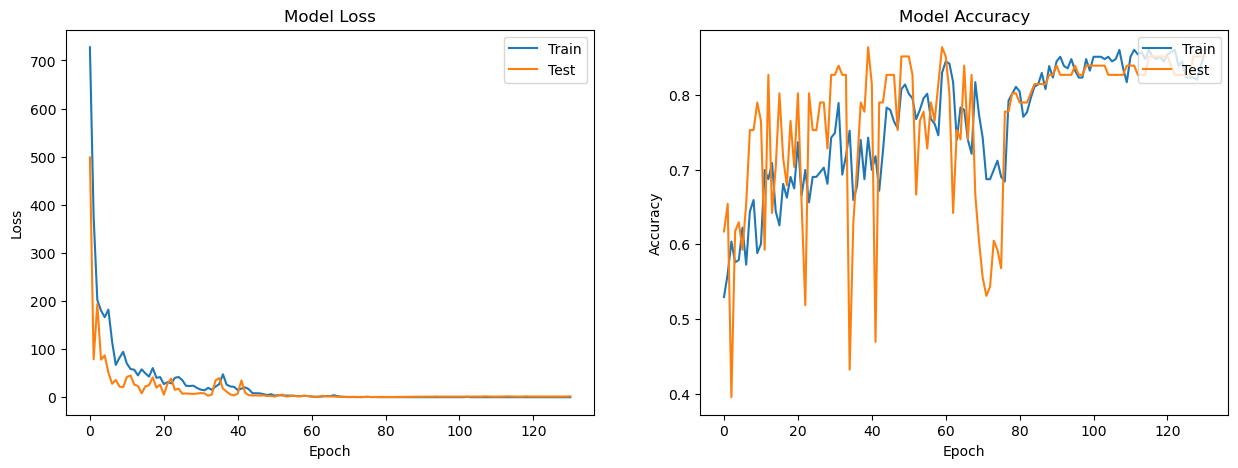

In [324]:
# plot the training loss and accuracy side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

In [325]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

4/4 [==============================] - 0s 7ms/step - loss: 3.2973 - accuracy: 0.7941
Test Loss: 3.297325849533081
Test Accuracy: 0.7941176295280457


1/1 [==============================] - 0s 36ms/step


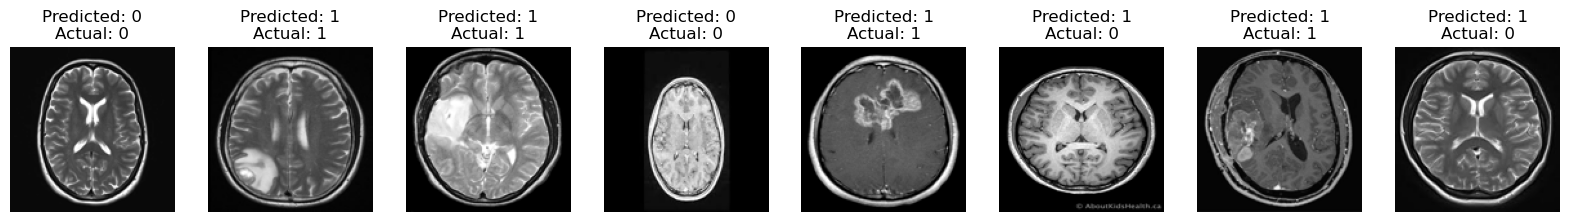

In [332]:
# Visualize five images from the test set with their predicted labels (five image in a row)
fig, axs = plt.subplots(1, 8, figsize=(20, 10))
for i in range(8):
    axs[i].imshow(X_test[i], cmap='gray')
    axs[i].set_title(f'Predicted: {np.argmax(model.predict(X_test[i:i+1]))}\nActual: {np.argmax(y_test[i])}')
    axs[i].axis('off')
    
plt.show()

4/4 [==============================] - 0s 6ms/step


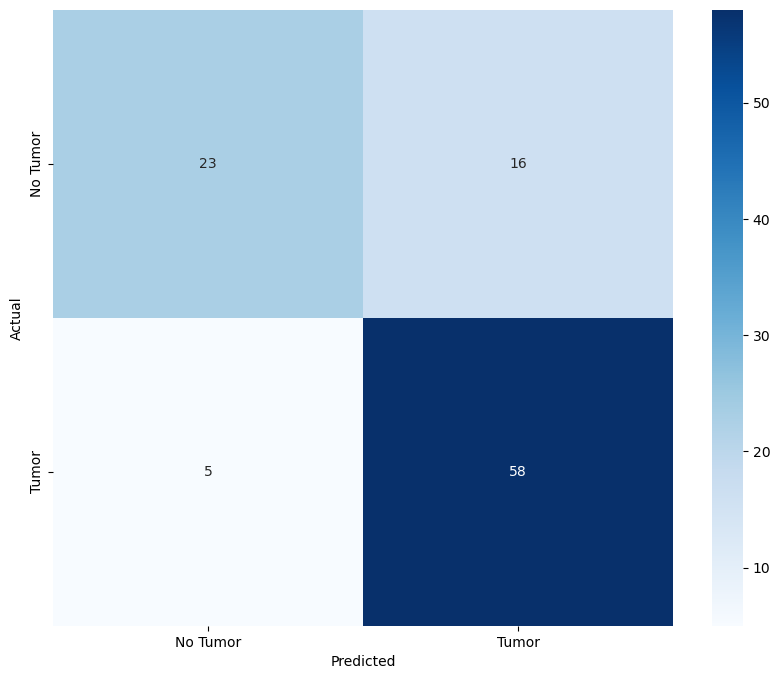

In [327]:
# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()